# Prompt Engineering Analysis

In [1]:
import pandas as pd
import numpy as np

data_path = "results/job_postings.csv"
data = pd.read_csv(data_path)
print("There is a total of", len(data), "job postings in the dataset.")

There is a total of 155 job postings in the dataset.


In [2]:
data.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3931995254,15454502.0,Prompt Engineer,Staff4Me is currently seeking a talented and d...,NaN,NaN,NaN,NaN,Full-time,India,...,NaN,Entry level,NaN,1716340123000,apply.workable.com,0,FULL_TIME,NaN,NaN,1739999881
1,3939466319,4312.0,NLP / Prompt Engineer (VicOne_Automotive Secur...,Join Trend ‧ Join New Generation\n\n趨勢科技 - 全球雲...,NaN,NaN,NaN,NaN,Full-time,"Taipei, Taipei City, Taiwan",...,NaN,Entry level,NaN,1740527470000,trendmicro.wd3.myworkdayjobs.com,0,FULL_TIME,NaN,NaN,1740627591
2,3967994817,NaN,Hiring For Gen AI/Prompt Engineer,\n\nRole: Gen AI/Prompt EngineerDesired Profil...,NaN,NaN,NaN,NaN,Full-time,"Madhavaram, Tamil Nadu, India",...,NaN,Entry level,NaN,1720227384000,www.timesjobs.com,0,FULL_TIME,NaN,NaN,1739999812
3,4037151117,28686355.0,AI prompt Engineer,Coders Brain is a global leader in its service...,NaN,NaN,NaN,NaN,Full-time,India,...,NaN,Mid-Senior level,NaN,1725604390000,app.pyjamahr.com,0,FULL_TIME,NaN,NaN,1739999812
4,4055264240,210122.0,PROMPT ENGINEER,Prompt Engineer\n\nLocation: Hyderabad\n\nExpe...,NaN,NaN,NaN,NaN,Full-time,"Hyderabad, Telangana, India",...,NaN,Entry level,NaN,1729363574000,www.timesjobs.com,0,FULL_TIME,NaN,NaN,1739999812


In [3]:
data.columns

Index(['job_id', 'company_id', 'title', 'description', 'max_salary',
       'med_salary', 'min_salary', 'pay_period', 'formatted_work_type',
       'location', 'applies', 'original_listed_time', 'remote_allowed',
       'views', 'job_posting_url', 'application_url', 'application_type',
       'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc',
       'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'scraped'],
      dtype='object')

In [4]:
# show all locations
data['location'].unique()

array(['India', 'Taipei, Taipei City, Taiwan',
       'Madhavaram, Tamil Nadu, India', 'Hyderabad, Telangana, India',
       'Xuhui District, Shanghai, China', 'Beijing, Beijing, China',
       'Sandy, UT', 'Mumbai Metropolitan Region', 'United States',
       'Bengaluru East, Karnataka, India',
       'Quezon City, National Capital Region, Philippines',
       'Barcelona, Catalonia, Spain',
       'Tel Aviv-Yafo, Tel Aviv District, Israel',
       'Gurgaon, Haryana, India', 'Chennai, Tamil Nadu, India',
       'Bari, Apulia, Italy', 'Tokyo, Tokyo, Japan', 'Denver, CO',
       'Greater Cleveland', 'Innere Stadt, Vienna, Austria',
       'Makati, National Capital Region, Philippines',
       'Bengaluru, Karnataka, India', 'Cambridge, MA', 'Prague, Czechia',
       'Portland, Oregon Metropolitan Area', 'Shanghai, Shanghai, China',
       'Londonderry, NH', 'San Francisco Bay Area',
       'Gurugram, Haryana, India', 'Croatia', 'Czechia', 'Romania',
       'Bagnolet, Île-de-France, France

# Data Preprocessing

In [5]:
# create a new country column

location_mapping = {
    'India': 'India',
    'Taipei, Taipei City, Taiwan': 'Taiwan',
    'Madhavaram, Tamil Nadu, India': 'India',
    'Hyderabad, Telangana, India': 'India',
    'Xuhui District, Shanghai, China': 'China',
    'Beijing, Beijing, China': 'China',
    'Sandy, UT': 'United States',
    'Mumbai Metropolitan Region': 'India',
    'United States': 'United States',
    'Bengaluru East, Karnataka, India': 'India',
    'Quezon City, National Capital Region, Philippines': 'Philippines',
    'Barcelona, Catalonia, Spain': 'Spain',
    'Tel Aviv-Yafo, Tel Aviv District, Israel': 'Israel',
    'Gurgaon, Haryana, India': 'India',
    'Chennai, Tamil Nadu, India': 'India',
    'Bari, Apulia, Italy': 'Italy',
    'Tokyo, Tokyo, Japan': 'Japan',
    'Denver, CO': 'United States',
    'Greater Cleveland': 'United States',
    'Innere Stadt, Vienna, Austria': 'Austria',
    'Makati, National Capital Region, Philippines': 'Philippines',
    'Bengaluru, Karnataka, India': 'India',
    'Cambridge, MA': 'United States',
    'Prague, Czechia': 'Czechia',
    'Portland, Oregon Metropolitan Area': 'United States',
    'Shanghai, Shanghai, China': 'China',
    'Londonderry, NH': 'United States',
    'San Francisco Bay Area': 'United States',
    'Gurugram, Haryana, India': 'India',
    'Croatia': 'Croatia',
    'Czechia': 'Czechia',
    'Romania': 'Romania',
    'Bagnolet, Île-de-France, France': 'France',
    'North Macedonia': 'North Macedonia',
    'Ukraine': 'Ukraine',
    'Poland': 'Poland',
    'Hungary': 'Hungary',
    'Serbia': 'Serbia',
    'United Kingdom': 'United Kingdom',
    'Frisco, TX': 'United States',
    'Ann Arbor, MI': 'United States',
    'Eagan, MN': 'United States',
    'London Area, United Kingdom': 'United Kingdom',
    'Budapest, Budapest, Hungary': 'Hungary',
    'Pune, Maharashtra, India': 'India',
    'Vilnius, Vilniaus, Lithuania': 'Lithuania',
    'Noida, Uttar Pradesh, India': 'India',
    'Greater St. Louis': 'United States',
    'Sydney, New South Wales, Australia': 'Australia',
    'San Francisco, CA': 'United States',
    'Washington DC-Baltimore Area': 'United States',
    'New Delhi, Delhi, India': 'India',
    'Palo Alto, CA': 'United States',
    'Portugal': 'Portugal',
    'Salt Lake City Metropolitan Area': 'United States',
    'Lehi, UT': 'United States',
    'Haidian District, Beijing, China': 'China',
    'Thessaloniki, Central Macedonia, Greece': 'Greece',
    'Ho Chi Minh City, Vietnam': 'Vietnam',
    'Guadalajara, Jalisco, Mexico': 'Mexico',
    'Cancún, Quintana Roo, Mexico': 'Mexico',
    'Mexico City, Mexico': 'Mexico',
    'Thessaloniki Metropolitan Area': 'Greece',
    'NAMER': 'North America',
    'Sunnyvale, CA': 'United States',
    'Ulm, Baden-Württemberg, Germany': 'Germany',
    'Montreal, QC': 'Canada',
    'Frankfurt, Hesse, Germany': 'Germany',
    'Munich, Bavaria, Germany': 'Germany',
    'Bangalore Urban, Karnataka, India': 'India',
    'Austin, TX': 'United States',
    'Manchester Area, United Kingdom': 'United Kingdom',
    'Brussels, Brussels Region, Belgium': 'Belgium',
    'Madrid, Community of Madrid, Spain': 'Spain',
    'Washington, DC': 'United States',
    'Miami, FL': 'United States',
    'Melbourne, Victoria, Australia': 'Australia',
    'Carlton, Victoria, Australia': 'Australia',
    'New York, NY': 'United States',
    'Delhi, India': 'India',
    'Ahmedabad, Gujarat, India': 'India',
    'Greater Chennai Area': 'India',
    'Philippines': 'Philippines',
    'Lahore, Punjab, Pakistan': 'Pakistan',
    'Los Altos, CA': 'United States',
    'Vancouver, BC': 'Canada',
    'Waterloo, ON': 'Canada',
    'Chicago, IL': 'United States',
    'Toronto, ON': 'Canada',
    'Boston, MA': 'United States',
    'Cupertino, CA': 'United States',
    'Irving, TX': 'United States',
    'Calgary, AB': 'Canada',
    'Pakistan': 'Pakistan'
}
# create a new column called country
data["country"] = data.location.map(location_mapping)


In [6]:
# For remote allowed jobs, I am assuming that companies that does not specify to allow remote work, do not allow remote work.
data['remote_allowed'] = data['remote_allowed'].fillna(0)
# mapping location to country, here I am using 

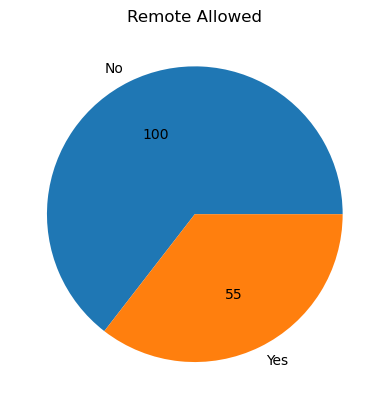

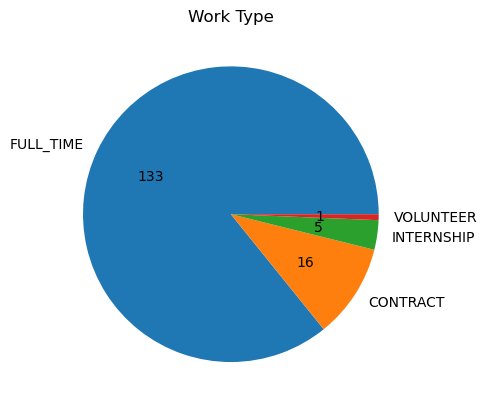

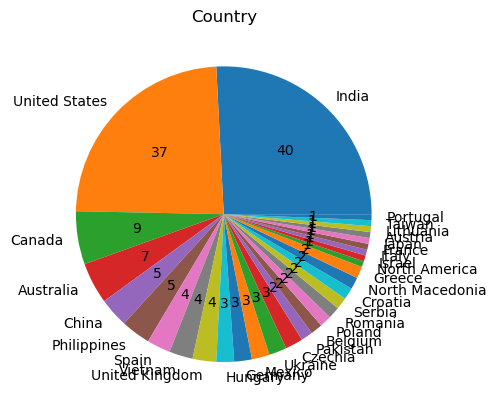

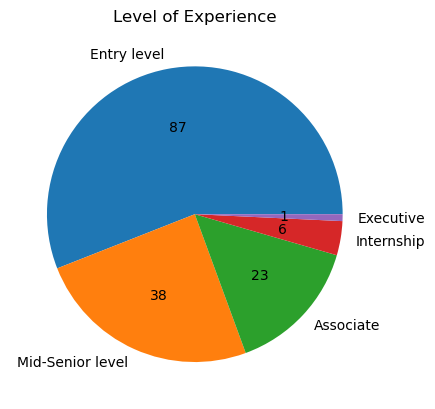

In [ ]:
import matplotlib.pyplot as plt
def plot_percentage(data, column, title, mapping = {0: 'No', 1: 'Yes'}):

    draw_data = data[column].replace(mapping)
    total = len(draw_data)
    draw_data.value_counts(normalize=True).plot(kind='pie', autopct=lambda p : '{:.0f}'.format(p * total / 100))
    plt.ylabel('')
    plt.title(title)
    plt.show()
plot_percentage(data, 'remote_allowed', 'Remote Allowed')
plot_percentage(data, 'work_type', 'Work Type')
plot_percentage(data, 'country', 'Country')
plot_percentage(data, 'formatted_experience_level', 'Level of Experience')

<Axes: >

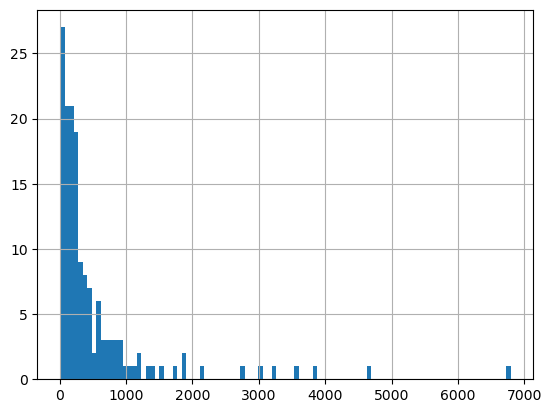

In [8]:
# plot the views as histogram

data.views.hist(bins=100)

TF-IDF matrix shape: (155, 1000)


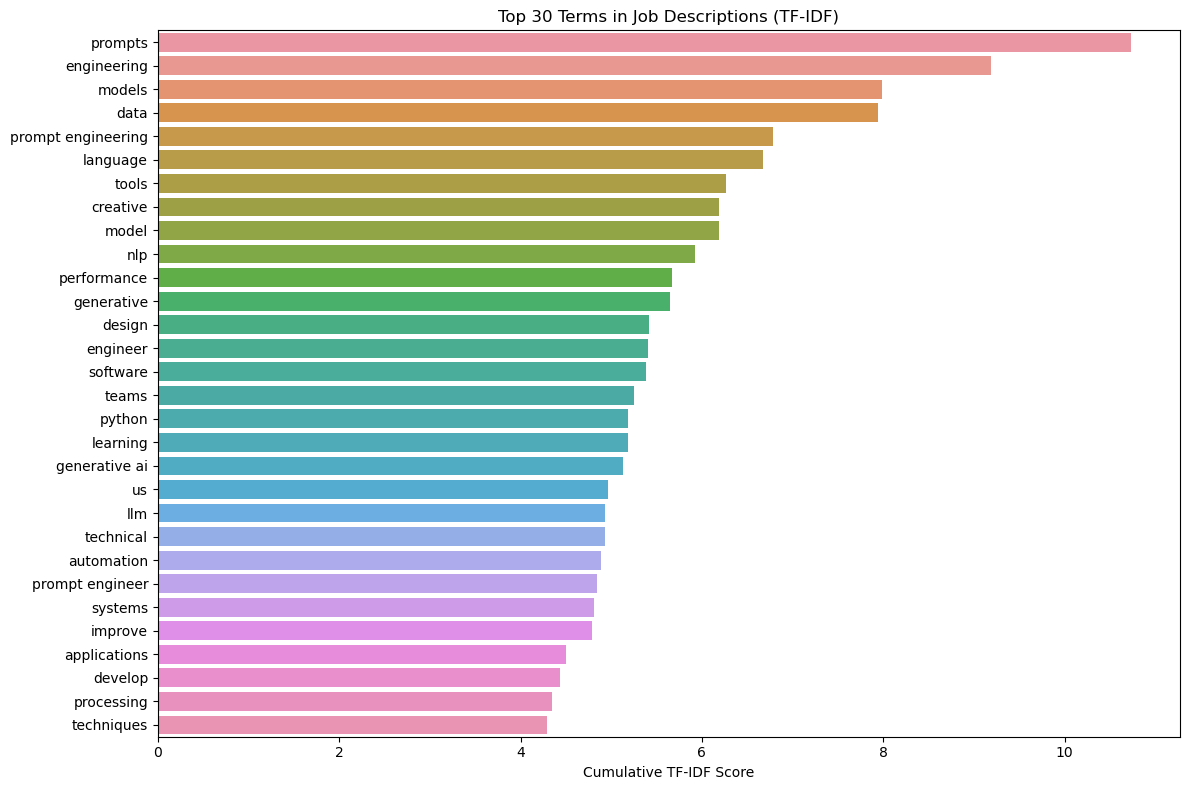

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords


# Function to clean and preprocess text
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)    
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Preprocess job descriptions
data['clean_description'] = data['description'].apply(preprocess_text)

# Create a corpus of job descriptions
description_corpus = data['clean_description'].dropna().tolist()

# Create a custom set of stopwords for job descriptions
custom_stopwords = list(stopwords.words('english')) + [
    'experience', 'work', 'team', 'company', 'working', 'job',
    'candidate', 'required', 'requirements', 'responsibilities',
    'position', 'role', 'skills', 'years', 'time', 'ability',
    'knowledge', 'strong', 'looking', 'new', 'day', 'including',
    'across', 'well', 'must', 'able', 'based', 'provide', 'within',
    'help', 'development', 'business', 'using', 'solutions', 'key'
]


# Generate TF-IDF features from job descriptions
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words=custom_stopwords,
    min_df=5,  # Minimum document frequency
    max_df=0.8,  # Maximum document frequency (as a percentage)
    ngram_range=(1, 2)  # Include both unigrams and bigrams
)

# Apply TF-IDF transformation
tfidf_matrix = tfidf_vectorizer.fit_transform(description_corpus)
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# Get feature names (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Sum TF-IDF scores across all documents for each term
tfidf_sum = np.array(tfidf_matrix.sum(axis=0)).flatten()
term_importance = {feature: score for feature, score in zip(feature_names, tfidf_sum)}

# Get top terms
top_terms = dict(sorted(term_importance.items(), key=lambda x: x[1], reverse=True)[:30])

# Visualize top terms
plt.figure(figsize=(12, 8))
sns.barplot(x=list(top_terms.values()), y=list(top_terms.keys()))
plt.title('Top 30 Terms in Job Descriptions (TF-IDF)')
plt.xlabel('Cumulative TF-IDF Score')
plt.tight_layout()
plt.savefig('top_terms_tfidf.png')
plt.show()




2. Performing topic modeling with K-Means...

Identified Topics (Clusters) with Top Terms:
Topic 1: ad, creative, ruby labs, labs, ruby, advertising, ai generated, generated, ai tools, production
Topic 2: sales, bonus, know, bonus points, points, clients, us, responses, testing, make
Topic 3: data, prompts, models, generative, generative ai, content, language, tools, engineering, python
Topic 4: web, software engineering, software, engineering, collaborative, semiotic, delivering value, protocol, cryptography software, cryptography
Topic 5: prompts, writing, thinking, engineers, output, creative, data, user, nlp, create
Topic 6: legal, automation, reuters, thomson, thomson reuters, employee, ai automation, driven, professionals, recruitment
Topic 7: agent, llm, du, people, services, prompts, en, teaming, one, real
Topic 8: engineering, systems, prompts, prompt engineering, data, prompt generation, technical, performance, nlp, conversational
Topic 9: per, code, proficient, chatbots, qu

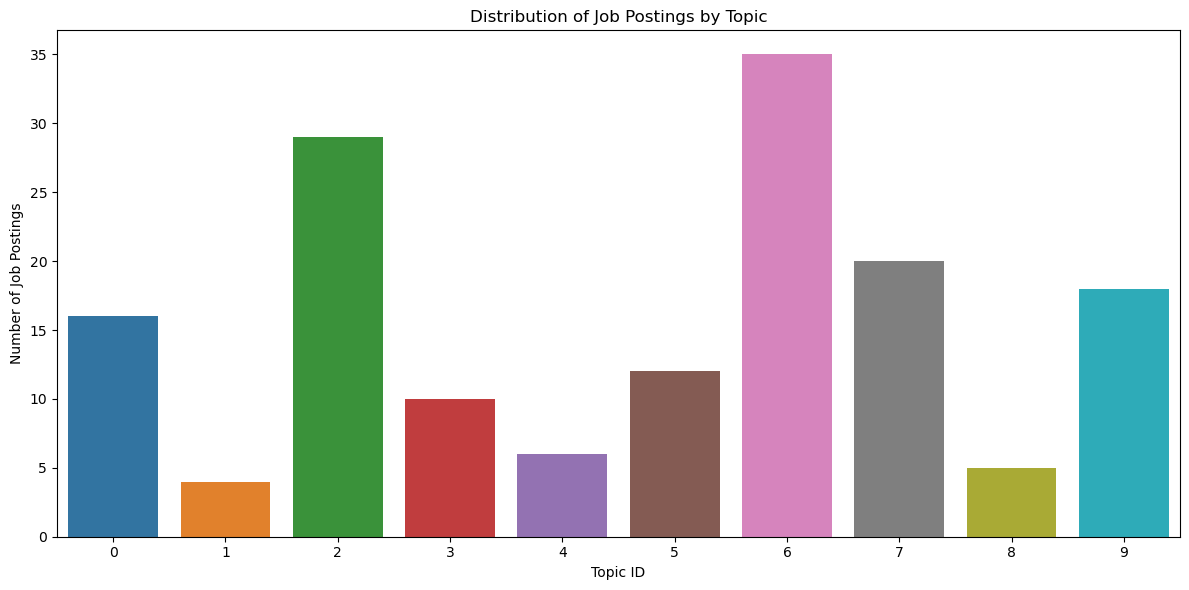

In [13]:
# 2. Topic Modeling with K-Means
print("\n2. Performing topic modeling with K-Means...")

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(tfidf_matrix)

def get_top_cluster_terms(cluster_centers, feature_names, n_terms=10):
    top_terms_by_cluster = {}
    for i, center in enumerate(cluster_centers):
        top_indices = center.argsort()[-n_terms:][::-1]
        top_terms_by_cluster[i] = [feature_names[j] for j in top_indices]
    return top_terms_by_cluster

# Get and print top terms for each cluster (topic)
topic_terms = get_top_cluster_terms(kmeans.cluster_centers_, feature_names)

print("\nIdentified Topics (Clusters) with Top Terms:")
for topic_id, terms in topic_terms.items():
    print(f"Topic {topic_id+1}: {', '.join(terms)}")

data['topic'] = clusters

topic_counts = data['topic'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title('Distribution of Job Postings by Topic')
plt.xlabel('Topic ID')
plt.ylabel('Number of Job Postings')

total = len(data)

plt.tight_layout()
plt.savefig('topic_distribution.png')
plt.show()





3. Extracting technical skills from job descriptions...

Top 30 Technical Skills Mentioned in Job Postings:
ai: 141 occurrences
prompt engineering: 80 occurrences
python: 79 occurrences
llm: 58 occurrences
nlp: 56 occurrences
testing: 46 occurrences
generative ai: 45 occurrences
machine learning: 44 occurrences
natural language processing: 43 occurrences
large language models: 39 occurrences
openai: 33 occurrences
gpt: 32 occurrences
cloud: 31 occurrences
ml: 30 occurrences
agile: 24 occurrences
artificial intelligence: 23 occurrences
networking: 22 occurrences
aws: 20 occurrences
azure: 20 occurrences
ruby: 20 occurrences
tensorflow: 19 occurrences
data science: 19 occurrences
git: 18 occurrences
api: 18 occurrences
pytorch: 16 occurrences
sql: 16 occurrences
data analysis: 14 occurrences
bert: 14 occurrences
rag: 14 occurrences
retrieval augmented generation: 11 occurrences


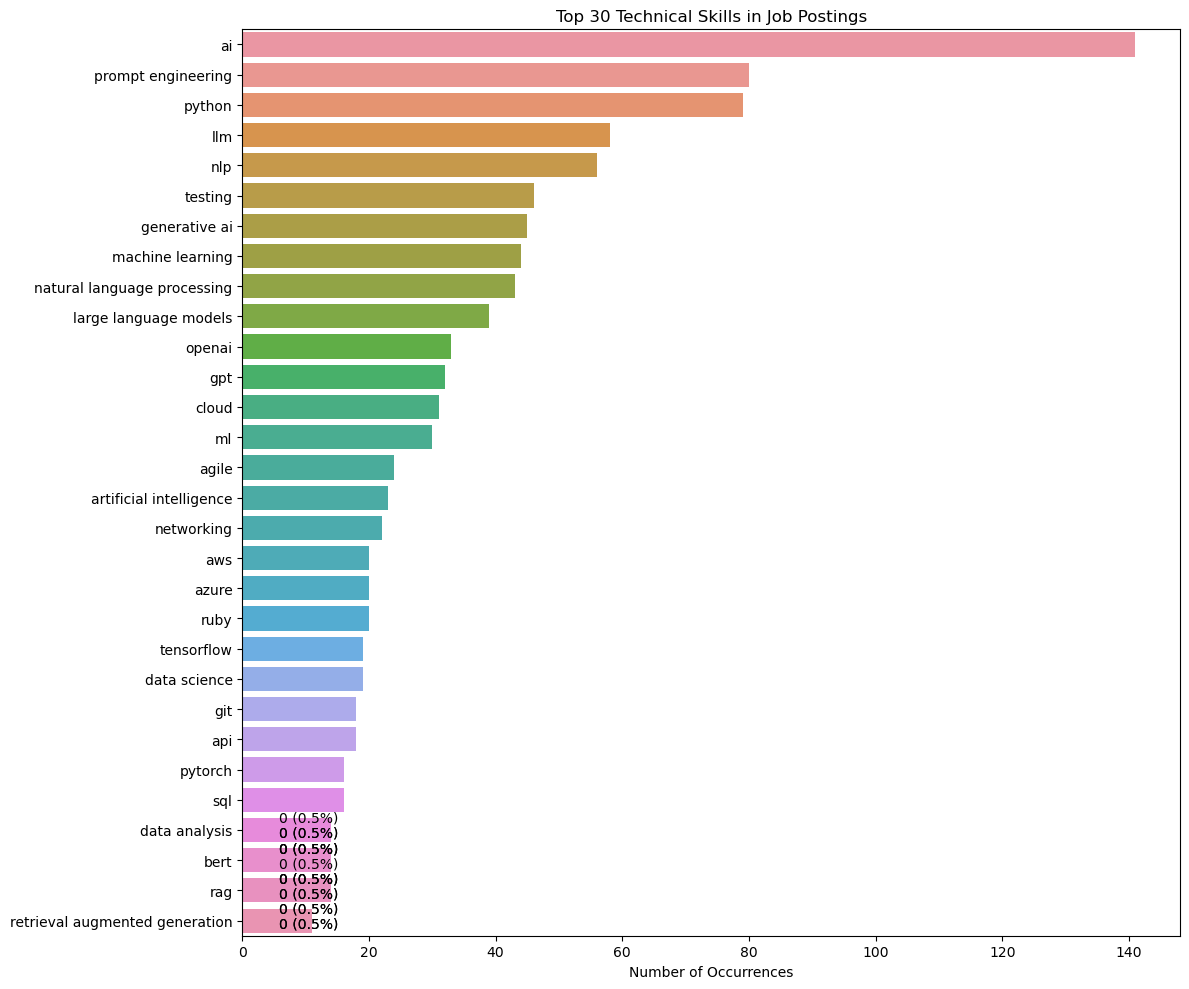

In [ ]:
# 3. Skills Extraction and Analysis
print("\n3. Extracting technical skills from job descriptions...")


tech_skills = [
    # Programming Languages
    'python', 'java', 'javascript', 'typescript', 'c++', 'c#', 'ruby', 'swift', 
    'kotlin', 'go', 'rust', 'php', 'perl', 'r', 'scala', 'matlab', 'bash', 'shell',
    
    # Web Development
    'html', 'css', 'react', 'angular', 'vue', 'svelte', 'jquery', 'bootstrap',
    'node.js', 'express', 'django', 'flask', 'spring', 'asp.net', 'laravel',
    'ruby on rails', 'webpack', 'rest api', 'graphql', 'websocket',
    
    # Databases
    'sql', 'mysql', 'postgresql', 'oracle', 'mongodb', 'cassandra', 'redis',
    'elasticsearch', 'dynamodb', 'sqlite', 'nosql', 'neo4j', 'mariadb',
    
    # Data Science & ML
    'machine learning', 'data science', 'artificial intelligence', 'ai', 'ml',
    'deep learning', 'neural networks', 'nlp', 'natural language processing',
    'computer vision', 'pandas', 'numpy', 'scipy', 'scikit-learn', 'tensorflow',
    'pytorch', 'keras', 'opencv', 'hadoop', 'spark', 'big data', 'data mining',
    'data analysis', 'statistical analysis', 'regression', 'classification',
    
    # AI & NLP Specific
    'llm', 'large language models', 'generative ai', 'gpt', 'bert', 'transformers',
    'prompt engineering', 'chatbot', 'rag', 'retrieval augmented generation',
    'vector database', 'semantic search', 'fine-tuning', 'text generation',
    'langchain', 'llamaindex', 'hugging face', 'openai', 'text embedding',
    
    # Cloud & DevOps
    'aws', 'azure', 'gcp', 'cloud', 'docker', 'kubernetes', 'terraform',
    'ansible', 'jenkins', 'gitlab ci', 'github actions', 'ci/cd', 'devops',
    'microservices', 'serverless', 'linux', 'unix', 'infrastructure as code',
    
    # Mobile Development
    'android', 'ios', 'flutter', 'react native', 'xamarin', 'swift', 'objective-c',
    'mobile development', 'app development',
    
    # Other Technical Skills
    'blockchain', 'cybersecurity', 'networking', 'git', 'version control',
    'agile', 'scrum', 'jira', 'qa', 'testing', 'selenium', 'api', 'sap',
    'tableau', 'power bi', 'data visualization', 'etl', 'ux/ui', 'figma',
    'adobe', 'photoshop', 'illustrator', 'game development', 'unity', 'unreal'
]

# Function to extract skills from job descriptions
def extract_skills(description, skills_list):
    description = description.lower()
    found_skills = []
    for skill in skills_list:
        if re.search(r'\b' + re.escape(skill) + r'\b', description):
            found_skills.append(skill)
    return found_skills

data['extracted_skills'] = data['clean_description'].apply(lambda x: extract_skills(x, tech_skills))

# Count the frequency of each skill
all_skills = []
for skills_list in data['extracted_skills']:
    all_skills.extend(skills_list)
    
skill_counter = Counter(all_skills)

# Display top skills
top_skills = dict(skill_counter.most_common(30))
print("\nTop 30 Technical Skills Mentioned in Job Postings:")
for skill, count in top_skills.items():
    print(f"{skill}: {count} occurrences")

# Visualize top skills
plt.figure(figsize=(12, 10))
ax = sns.barplot(x=list(top_skills.values()), y=list(top_skills.keys()))
plt.title('Top 30 Technical Skills in Job Postings')
plt.xlabel('Number of Occurrences')

plt.tight_layout()
plt.savefig('top_skills.png')
plt.show()



Average number of technical skills per job posting: 7.89
Median number of technical skills per job posting: 7.00


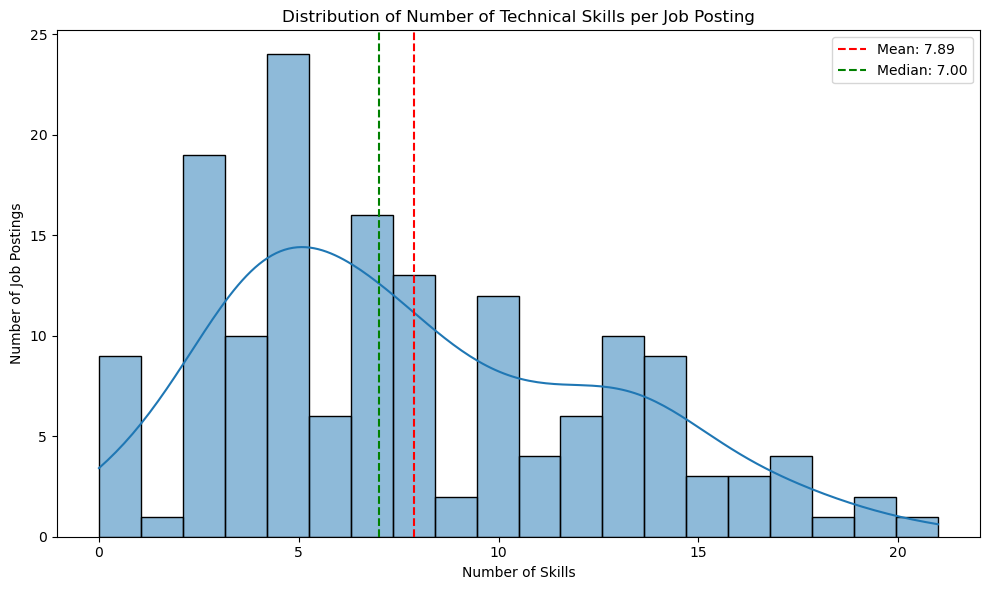


Most Common Skills by Topic:

Topic 1:
Top terms: ad, creative, ruby labs, labs, ruby
Top skills:
  - ruby: 16 occurrences
  - ai: 16 occurrences
  - networking: 16 occurrences

Topic 2:
Top terms: sales, bonus, know, bonus points, points
Top skills:
  - python: 4 occurrences
  - ai: 4 occurrences
  - ml: 4 occurrences
  - nlp: 4 occurrences
  - prompt engineering: 4 occurrences
  - cloud: 4 occurrences
  - testing: 4 occurrences
  - api: 4 occurrences

Topic 3:
Top terms: data, prompts, models, generative, generative ai
Top skills:
  - ai: 28 occurrences
  - python: 20 occurrences
  - prompt engineering: 20 occurrences
  - generative ai: 19 occurrences
  - llm: 14 occurrences
  - large language models: 13 occurrences
  - openai: 11 occurrences
  - nlp: 9 occurrences
  - machine learning: 9 occurrences
  - data science: 9 occurrences

Topic 4:
Top terms: web, software engineering, software, engineering, collaborative
Top skills:
  - artificial intelligence: 10 occurrences
  - ai: 10 o

In [12]:
# 4. Calculate the average number of skills per job posting
skills_per_job = data['extracted_skills'].apply(len)
avg_skills = skills_per_job.mean()
median_skills = skills_per_job.median()

print(f"\nAverage number of technical skills per job posting: {avg_skills:.2f}")
print(f"Median number of technical skills per job posting: {median_skills:.2f}")

# Visualize distribution of number of skills per job
plt.figure(figsize=(10, 6))
sns.histplot(skills_per_job, kde=True, bins=20)
plt.axvline(avg_skills, color='r', linestyle='--', label=f'Mean: {avg_skills:.2f}')
plt.axvline(median_skills, color='g', linestyle='--', label=f'Median: {median_skills:.2f}')
plt.title('Distribution of Number of Technical Skills per Job Posting')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.legend()
plt.tight_layout()
plt.savefig('skills_distribution.png')
plt.show()

# 5. Skills by Topic (Cluster)
# Compute the most common skills for each topic
skills_by_topic = {}
for topic_id in range(n_clusters):
    topic_data = data[data['topic'] == topic_id]
    topic_skills = []
    for skills_list in topic_data['extracted_skills']:
        topic_skills.extend(skills_list)
    
    skills_counter = Counter(topic_skills)
    skills_by_topic[topic_id] = dict(skills_counter.most_common(10))

# Print the most common skills for each topic
print("\nMost Common Skills by Topic:")
for topic_id, skills in skills_by_topic.items():
    print(f"\nTopic {topic_id+1}:")
    print(f"Top terms: {', '.join(topic_terms[topic_id][:5])}")
    print("Top skills:")
    for skill, count in skills.items():
        print(f"  - {skill}: {count} occurrences")

# 6. Create a summary table of topics with their interpretations
# Based on the top terms and skills, we can attempt to label each topic
topic_interpretations = {
    # These would be filled in after examining the results
    # Example: 0: "Data Science & Machine Learning Jobs"
}

